# Betty Zhang

## Research question/interests

### How can banks minimize credit risk and maximize benefits when determining credit limits for clients, considering factors such as gender, age, education, marital status, payment behaviour, and credit utilization patterns?

#####     The motivation for selecting this dataset originated from a conversation with a bank advisor who recommended keeping my spending below half of my credit limit. For instance, if my monthly credit limit is 3,000 dollars, I should strive to keep my expenses under 1,500 dollars per month. This conversation piqued my curiosity about how banks determine credit limits. Since credit is an essential component when making significant purchases like homes, cars, and education, understanding the factors that banks consider when setting credit limits is crucial. 

#####     Despite credit cards benefiting users, it is important to recognize that banks issue them because they can be profitable. As the fundamental concept behind credit is to loan money, inherent risks exist. Therefore, utilizing the given dataset, I aim to explore several sub-questions from a bank’s perspective:

##### 1. To gain insight into credit limit determination from a bank’s perspective, I plan to investigate whether gender, age, education, and marital status impact available credit. Specifically, I aim to identify whether certain demographics should be granted higher credit limits and determine if any correlations exist between these variables and available credit. I will analyze each variable against available credit, examining factors such as whether gender influences credit availability and if elder individuals tend to have higher credit limits. Subsequently, I will combine and group these sub-comparisons to identify any relationships that may exist. 
##### 2. I will explore whether credit utilization patterns impact credit availability by comparing individuals with similar bills but differing bill payment patterns throughout the research period. While it is clear that payment behaviour influences credit availability, I aim to identify any correlation between the number of late payments and available credit, considering that unexpected circumstances may impact one’s ability to make payments on time.
##### 3. I plan to investigate how a client’s previous payment behaviour, such as only making minimum or partial bill payments, may affect credit availability. This will enable me to assess how banks should consider the associated risk. 


In [25]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from scipy.stats import norm

In [26]:
# Import Dataset
df =pd.read_excel(io=r'../data/raw/default of credit card clients.xls')
df.drop("Unnamed: 0",axis=1)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# Milestone 3 EDA

In [27]:
# get the demension of the dataset (num of rows, num of cols)
df.shape

(30001, 25)

In [28]:
# get the first 5 rows of the dataset (in order to see some sample values for each variable)
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [29]:
# get the name of all of the columns in the dataset
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [30]:
# convert the 1st row to column header (since the column headers are Xi which is hard to define their meaning)
df1 = df.rename(columns=df.iloc[0])

In [31]:
# drop the first row and reset the index
df2 = df1.iloc[1:].reset_index()
df = df2
df

,index,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,1,20000,2,2,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,2,120000,2,2,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,3,90000,2,2,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,4,50000,2,2,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,5,50000,1,2,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,29996,220000,1,3,1,39,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,29997,150000,1,3,2,43,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,29998,30000,1,2,2,37,4,3,2,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,29999,80000,1,3,1,41,1,-1,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [32]:
# check the variables' types
df.dtypes

index                          int64
ID                            object
LIMIT_BAL                     object
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                           object
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
BILL_AMT1                     object
BILL_AMT2                     object
BILL_AMT3                     object
BILL_AMT4                     object
BILL_AMT5                     object
BILL_AMT6                     object
PAY_AMT1                      object
PAY_AMT2                      object
PAY_AMT3                      object
PAY_AMT4                      object
PAY_AMT5                      object
PAY_AMT6                      object
default payment next month    object
dtype: object

In [33]:
# summarize the count, mean, std, min, max for numeric variables
df.describe(include = [np.number])

,index
count,30000.000000
mean,15000.500000
std,8660.398374
min,1.000000
25%,7500.750000
50%,15000.500000
75%,22500.250000
max,30000.000000


In [34]:
# summarize the count, unique, top and frequency for categorical variables
df.describe(exclude = [np.number]).T

,count,unique,top,freq
ID,30000,30000,1,1
LIMIT_BAL,30000,81,50000,3365
SEX,30000,2,2,18112
EDUCATION,30000,7,2,14030
MARRIAGE,30000,4,2,15964
AGE,30000,56,29,1605
PAY_0,30000,11,0,14737
PAY_2,30000,11,0,15730
PAY_3,30000,11,0,15764
PAY_4,30000,11,0,16455


In [35]:
# convert the object variables into numberical variables
df1 = df.apply(pd.to_numeric)
df = df1

In [36]:
# check the type of each columns to make sure the conversion is correct
df.dtypes

index                         int64
ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [37]:
#summarize the count, mean, std, min, max for the data set
df.describe()

,index,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [38]:
# get the number of unique values for each variable
df.nunique(axis = 0)

index                         30000
ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [39]:
# Removing rows with null values using method chaining
df_cleaned = df.dropna(axis = 0).drop(columns = 'index')
df_cleaned

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [40]:
# Removing the unexpected values (for example, "education" has 1 to 4, however in the data set, there were 5 and 6)
df = df.drop(df.loc[df['EDUCATION'] ==5].index, inplace = True)
df

[Text(0, 0.5, '')]

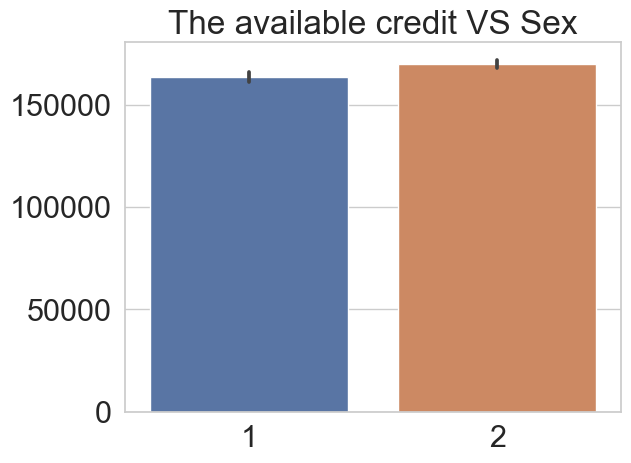

In [41]:
sns.set_theme(style = "whitegrid", font_scale = 2)
limit_sex = sns.barplot(data = df_cleaned, x = 'SEX', y = 'LIMIT_BAL')
limit_sex.set(title = 'The available credit VS Sex')
limit_sex.set(xlabel = None)
limit_sex.set(ylabel = None)

[Text(0, 0.5, '')]

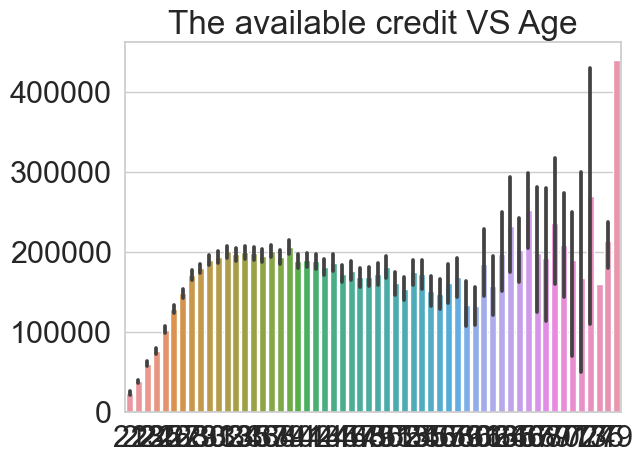

In [42]:
limit_age = sns.barplot(data = df_cleaned, x = 'AGE', y = 'LIMIT_BAL')
limit_age.set(title = 'The available credit VS Age')
limit_age.set(xlabel = None)
limit_age.set(ylabel = None)

[Text(0, 0.5, '')]

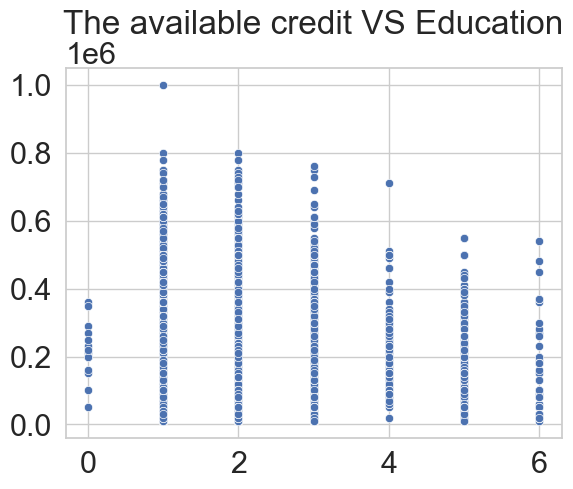

In [43]:
limit_edu = sns.scatterplot(data = df_cleaned, x = 'EDUCATION', y = 'LIMIT_BAL')
limit_edu.set(title = 'The available credit VS Education')
limit_edu.set(xlabel = None)
limit_edu.set(ylabel = None)

[Text(0, 0.5, '')]

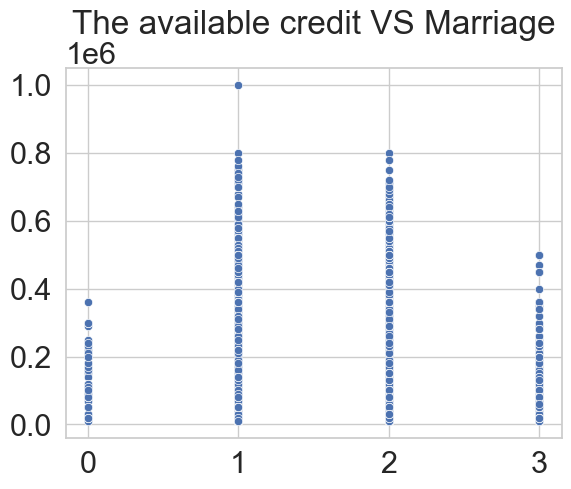

In [44]:
limit_mar = sns.scatterplot(data = df_cleaned, x = 'MARRIAGE', y = 'LIMIT_BAL')
limit_mar.set(title = 'The available credit VS Marriage')
limit_mar.set(xlabel = None)
limit_mar.set(ylabel = None)

In [45]:
# Create new columns to observe the payment behaviour
df_cleaned['PB1'] = df_cleaned['BILL_AMT1'] - df_cleaned['PAY_AMT1']
df_cleaned['PB2'] = df_cleaned['BILL_AMT2'] - df_cleaned['PAY_AMT2']
df_cleaned['PB3'] = df_cleaned['BILL_AMT3'] - df_cleaned['PAY_AMT3']
df_cleaned['PB4'] = df_cleaned['BILL_AMT4'] - df_cleaned['PAY_AMT4']
df_cleaned['PB5'] = df_cleaned['BILL_AMT5'] - df_cleaned['PAY_AMT5']
df_cleaned['PB6'] = df_cleaned['BILL_AMT6'] - df_cleaned['PAY_AMT6']
df_cleaned

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,PB1,PB2,PB3,PB4,PB5,PB6
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,1,3913,2413,689,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,2682,725,1682,2272,3455,1261
2,3,90000,2,2,2,34,0,0,0,0,...,1000,1000,5000,0,27721,12527,12559,13331,13948,10549
3,4,50000,2,2,1,37,0,0,0,0,...,1100,1069,1000,0,44990,46214,48091,27214,27890,28547
4,5,50000,1,2,1,57,-1,0,-1,0,...,9000,689,679,0,6617,-31011,25835,11940,18457,18452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,3047,5000,1000,0,180448,172815,203362,84957,26237,14980
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,129,0,0,0,-154,-1698,-5496,8850,5190,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,4200,2000,3100,1,3565,3356,-19242,16678,18582,16257
29998,29999,80000,1,3,1,41,1,-1,0,0,...,1926,52964,1804,1,-87545,74970,75126,50848,-41109,47140


In [46]:
df_cleaned.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,PB1,PB2,PB3,PB4,PB5,PB6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,3.000000e+04,30000.00000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,4826.076867,4799.387633,5215.502567,0.221200,45559.750400,4.325791e+04,4.178747e+04,38436.87210,35512.013333,33656.257833
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,15666.159744,15278.305679,17777.465775,0.415062,73173.789447,7.256594e+04,6.929536e+04,64200.61083,60553.370054,60151.290836
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,-733744.000000,-1.702347e+06,-8.546410e+05,-667000.00000,-414380.000000,-684896.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,296.000000,252.500000,117.750000,0.000000,745.000000,3.295000e+02,2.627500e+02,230.00000,0.000000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,1500.000000,1500.000000,1500.000000,0.000000,18550.500000,1.810250e+04,1.776900e+04,16970.00000,15538.000000,13926.500000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,4013.250000,4031.500000,4000.000000,0.000000,62241.500000,5.907775e+04,5.629425e+04,50259.50000,46961.500000,46067.250000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,621000.000000,426529.000000,528666.000000,1.000000,913727.000000,9.332080e+05,1.542258e+06,841586.00000,877171.000000,911408.000000


### Observations and Analysis
##### After extracting the basic information from the dataset, I realized that the column headers labeled as "Xi" were difficult to read. To make the dataset more readable, I changed the first row that contained all of the column names to the header and removed the first row. I noticed that all of the columns, except for the index column, were in the "object" variable type. However, for analysis and plotting purposes, I needed the variables to be in numeric format. Therefore, I converted the entire dataset into a numeric type. I created several plots to show the correlation between age, education, marital status, gender, and available credit. Additionally, I used the describe() function to extract statistical information, such as the average, minimum, maximum, standard deviation, etc., for each column.Finally, I created new columns to answer additional questions.

### Refine Research Question
#### How can banks minimize credit risk and maximize benefits when determining credit limits for clients, considering factors such as gender, age, education, marital status, payment behaviour, and credit utilization patterns?
##### After doing the EDA, my research questions are not been answered yet. I still need to have more plots with the new columns I created and maybe I need more col

# Milestone 4

In [47]:
# Load the cleaned dataset from EDA in Milestone 3
data = df_cleaned
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,PB1,PB2,PB3,PB4,PB5,PB6
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,1,3913,2413,689,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,2682,725,1682,2272,3455,1261
2,3,90000,2,2,2,34,0,0,0,0,...,1000,1000,5000,0,27721,12527,12559,13331,13948,10549
3,4,50000,2,2,1,37,0,0,0,0,...,1100,1069,1000,0,44990,46214,48091,27214,27890,28547
4,5,50000,1,2,1,57,-1,0,-1,0,...,9000,689,679,0,6617,-31011,25835,11940,18457,18452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,3047,5000,1000,0,180448,172815,203362,84957,26237,14980
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,129,0,0,0,-154,-1698,-5496,8850,5190,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,4200,2000,3100,1,3565,3356,-19242,16678,18582,16257
29998,29999,80000,1,3,1,41,1,-1,0,0,...,1926,52964,1804,1,-87545,74970,75126,50848,-41109,47140


In [48]:
# Check the file types
data.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
PB1                           int64
PB2                           int64
PB3                         

In [49]:
# Check delimiters (space, comma, tab)
def check_delim(data):
    if ' ' in data.columns:
        print('Space delimiter found')
    elif ',' in data.columns:
        print('Comma delimiter found')
    elif '\t' in data.columns:
        print('Tab delimiter found')
    else:
        print('No delimiter found')
check_delim(data)

No delimiter found


In [50]:
# Remove the incorrect data, for example, in EDUCATION, the value 0, 5 and 6 are undefined; in MARRIAGE, the value 0 is undefined
data = data[~data['EDUCATION'].isin([0, 5, 6])].\
        drop(data[data['MARRIAGE'] == 0].index)
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,PB1,PB2,PB3,PB4,PB5,PB6
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,1,3913,2413,689,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,2682,725,1682,2272,3455,1261
2,3,90000,2,2,2,34,0,0,0,0,...,1000,1000,5000,0,27721,12527,12559,13331,13948,10549
3,4,50000,2,2,1,37,0,0,0,0,...,1100,1069,1000,0,44990,46214,48091,27214,27890,28547
4,5,50000,1,2,1,57,-1,0,-1,0,...,9000,689,679,0,6617,-31011,25835,11940,18457,18452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,3047,5000,1000,0,180448,172815,203362,84957,26237,14980
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,129,0,0,0,-154,-1698,-5496,8850,5190,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,4200,2000,3100,1,3565,3356,-19242,16678,18582,16257
29998,29999,80000,1,3,1,41,1,-1,0,0,...,1926,52964,1804,1,-87545,74970,75126,50848,-41109,47140


In [80]:
# Based on the three sub questions, 3 different sub data sets are needed with different columns
data1 = data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']].dropna()
data2 = data.drop(columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE','PB1', 'PB2', 'PB3', 'PB4', 'PB5', 'PB6']).dropna()
data3 = data[['LIMIT_BAL','PB1', 'PB2', 'PB3', 'PB4', 'PB5', 'PB6']].dropna()
default_credit_df1 = data1.to_csv('/Users/bettyzhang/Desktop/DATA_301/project-group-group27/data/processed/processed_data_Betty/df_cleaned1.csv')
default_credit_df2 = data2.to_csv('/Users/bettyzhang/Desktop/DATA_301/project-group-group27/data/processed/processed_data_Betty/df_cleaned2.csv')
default_credit_df3 = data3.to_csv('/Users/bettyzhang/Desktop/DATA_301/project-group-group27/data/processed/processed_data_Betty/df_cleaned3.csv')

In [ ]:
# Define a function to calculate the mean credit limit for a given demographic group
def mean_creditlim (data1, demographic, value):
    return data1[data1[demographic] == value]['LIMIT_BAL'].mean()
demographic_means = {}
for demographic in ['SEX', 'EDUCATION', 'MARRIAGE']:
    values = data1[demographic].unique()
    for value in values:
        mean_limit = mean_creditlim(data1, demographic, value)
        demographic_means[(demographic, value)] = mean_limit
for demographic, value in demographic_means:
    print(f'Mean credit limit for {demographic} = {value}: {demographic_means[(demographic, value)]}')

In [52]:
# Define a function to calculate the max credit limit for a given demographic group
def max_creditlim (data1, demographic, value):
    return data1[data1[demographic] == value]['LIMIT_BAL'].max()
demographic_max = {}
for demographic in ['SEX', 'EDUCATION', 'MARRIAGE']:
    values = data1[demographic].unique()
    for value in values:
        max_limit = max_creditlim(data1, demographic, value)
        demographic_max[(demographic, value)] = max_limit
for demographic, value in demographic_max:
    print(f'Max credit limit for {demographic} = {value}: {demographic_max[(demographic, value)]}')

Max credit limit for SEX = 2: 1000000
Max credit limit for SEX = 1: 800000
Max credit limit for EDUCATION = 2: 800000
Max credit limit for EDUCATION = 1: 1000000
Max credit limit for EDUCATION = 3: 760000
Max credit limit for EDUCATION = 4: 710000
Max credit limit for MARRIAGE = 1: 1000000
Max credit limit for MARRIAGE = 2: 800000
Max credit limit for MARRIAGE = 3: 500000


In [79]:
# Define a function to calculate the min credit limit for a given demographic group
def min_creditlim (data1, demographic, value):
    return data1[data1[demographic] == value]['LIMIT_BAL'].min()
demographic_min = {}
for demographic in ['SEX', 'EDUCATION', 'MARRIAGE']:
    values = data1[demographic].unique()
    for value in values:
        min_limit = min_creditlim(data1, demographic, value)
        demographic_min[(demographic, value)] = min_limit
for demographic, value in demographic_min:
    print(f'Min credit limit for {demographic} = {value}: {demographic_min[(demographic, value)]}')

Min credit limit for SEX = 2: 10000
Min credit limit for SEX = 1: 10000
Min credit limit for EDUCATION = 2: 10000
Min credit limit for EDUCATION = 1: 10000
Min credit limit for EDUCATION = 3: 10000
Min credit limit for EDUCATION = 4: 20000
Min credit limit for MARRIAGE = 1: 10000
Min credit limit for MARRIAGE = 2: 10000
Min credit limit for MARRIAGE = 3: 10000


##### Here I want to do some normal distribution (the bell shape graph with min max and mean)

In [54]:
def age_category(age):
    if age < 30:
        return 'Under 30'
    elif age < 40:
        return '30-39'
    elif age < 50:
        return '40-49'
    elif age < 60:
        return '50-59'
    else:
        return '60 and over'

In [55]:
# Apply the age_category function to create a new column 'AGE_GROUP'
data1['AGE_GROUP'] = data1['AGE'].apply(age_category)

In [56]:
# Calculate the mean credit limit for different age groups
age_mean = data1.groupby('AGE_GROUP')['LIMIT_BAL'].mean()
print('\nMean credit limit for different age groups:')
print(age_mean)


Mean credit limit for different age groups:
AGE_GROUP
30-39          197225.126172
40-49          180911.816179
50-59          163684.210526
60 and over    187014.925373
Under 30       124280.760744
Name: LIMIT_BAL, dtype: float64


In [57]:
# Calculate the max credit limit for different age groups
age_max = data1.groupby('AGE_GROUP')['LIMIT_BAL'].max()
print('\nMax credit limit for different age groups:')
print(age_max)


Max credit limit for different age groups:
AGE_GROUP
30-39           740000
40-49          1000000
50-59           800000
60 and over     680000
Under 30        750000
Name: LIMIT_BAL, dtype: int64


In [58]:
# Calculate the min credit limit for different age groups
age_min = data1.groupby('AGE_GROUP')['LIMIT_BAL'].min()
print('\nMin credit limit for different age groups:')
print(age_min)


Min credit limit for different age groups:
AGE_GROUP
30-39          10000
40-49          10000
50-59          10000
60 and over    10000
Under 30       10000
Name: LIMIT_BAL, dtype: int64


In [59]:
def cal_corr(x,y):
    return np.corrcoef(x, y)[0, 1]

In [60]:
corr_sex = cal_corr(data1['SEX'], data1['LIMIT_BAL'])
print("Correlation between credit limit and gender: ", corr_sex)

Correlation between credit limit and gender:  0.02481718284291872


In [61]:
corr_edu = cal_corr(data1['EDUCATION'], data1['LIMIT_BAL'])
print("Correlation between credit limit and education: ", corr_edu)

Correlation between credit limit and education:  -0.2440388106254076


In [62]:
corr_mar = cal_corr(data1['MARRIAGE'], data1['LIMIT_BAL'])
print("Correlation between credit limit and mariage status: ", corr_mar)

Correlation between credit limit and mariage status:  -0.10975646389724908


In [63]:
corr_age = cal_corr(data1['AGE'], data1['LIMIT_BAL'])
print("Correlation between credit limit and age: ", corr_age)

Correlation between credit limit and age:  0.14421445094154492


##### So age, education, sex and marriage status actually does not have a correlation with limit balance where sex has the least correlation, educatoin and marriage tend to a negative weak correlation, and age has a positive weak correlation.

In [64]:
# Create a new column calculated the bill amount average
# Create a new column calculated the pay amount average
# Create a new column calculated the number of past payment average
data2['BILL_AMT_Avg'] = (data2['BILL_AMT1']+data2['BILL_AMT2']+data2['BILL_AMT3']+data2['BILL_AMT4']+data2['BILL_AMT5']+data2['BILL_AMT6'])/6
data2['PAY_AMT_Avg'] = (data2['PAY_AMT1']+data2['PAY_AMT2']+data2['PAY_AMT3']+data2['PAY_AMT4']+data2['PAY_AMT5']+data2['PAY_AMT6'])/6
data2['PAST_PAY_Avg'] = (data2['PAY_0']+data2['PAY_2']+data2['PAY_3']+data2['PAY_4']+data2['PAY_5']+data2['PAY_6'])/6
data2

,ID,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL_AMT_Avg,PAY_AMT_Avg,PAST_PAY_Avg
0,1,20000,2,2,-1,-1,-2,-2,3913,3102,...,0,689,0,0,0,0,1,1284.000000,114.833333,-0.333333
1,2,120000,-1,2,0,0,0,2,2682,1725,...,0,1000,1000,1000,0,2000,1,2846.166667,833.333333,0.500000
2,3,90000,0,0,0,0,0,0,29239,14027,...,1518,1500,1000,1000,1000,5000,0,16942.166667,1836.333333,0.000000
3,4,50000,0,0,0,0,0,0,46990,48233,...,2000,2019,1200,1100,1069,1000,0,38555.666667,1398.000000,0.000000
4,5,50000,-1,0,-1,0,0,0,8617,5670,...,2000,36681,10000,9000,689,679,0,18223.166667,9841.500000,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,0,0,0,0,0,0,188948,192815,...,8500,20000,5003,3047,5000,1000,0,120891.500000,7091.666667,0.000000
29996,29997,150000,-1,-1,-1,-1,0,0,1683,1828,...,1837,3526,8998,129,0,0,0,3530.333333,2415.000000,-0.666667
29997,29998,30000,4,3,2,-1,0,0,3565,3356,...,0,0,22000,4200,2000,3100,1,11749.333333,5216.666667,1.333333
29998,29999,80000,1,-1,0,0,0,-1,-1645,78379,...,85900,3409,1178,1926,52964,1804,1,44435.166667,24530.166667,-0.166667


In [65]:
# Define a function to calculate credit utilization ratio
def credit_utilization(balance, limit):
    return balance / limit

In [66]:
# Apply the credit_utilization function to create a new column 'CREDIT_UTILIZATION'
data2['CREDIT_UTILIZATION'] = data2.apply(lambda x: credit_utilization(x['BILL_AMT_Avg'], x['LIMIT_BAL']), axis=1)

In [67]:
# Define a function to categorize late payments
def late_payment_category(payment):
    if payment < 0:
        return 'Pay duly'
    elif payment == 0:
        return 'No Late Payment'
    elif payment < 3:
        return 'Payment delay for 1-2 months'
    elif payment < 6:
        return 'Payment delay for 2-5 months'
    else:
        return 'Payment delay for more than 5 months'

In [68]:
# Apply the late_payment_category function to create a new column 'LATE_PAYMENT_CATEGORY'
data2['LATE_PAYMENT_CATEGORY'] = data2['PAST_PAY_Avg'].apply(late_payment_category)

In [69]:
# Group the data by each late payment category and calculate the mean credit limit
late_payment_credit = data2.groupby('PAST_PAY_Avg')['LIMIT_BAL'].mean()
print('Late Payment Category vs. Credit Limit:')
print(late_payment_credit)

Late Payment Category vs. Credit Limit:
PAST_PAY_Avg
-2.000000    252582.046332
-1.833333    240344.827586
-1.666667    208831.615120
-1.500000    208370.197905
-1.333333    182889.812890
-1.166667    212130.081301
-1.000000    210348.178138
-0.833333    216976.076555
-0.666667    201324.041812
-0.500000    201434.034417
-0.333333    172945.075758
-0.166667    170651.021953
 0.000000    162523.962885
 0.166667    140506.756757
 0.333333    114098.712446
 0.500000    111174.652241
 0.666667    108842.696629
 0.833333     92644.836272
 1.000000    101989.051095
 1.166667     76891.495601
 1.333333     97880.658436
 1.500000     78978.494624
 1.666667     92546.583851
 1.833333     87258.566978
 2.000000    106254.180602
 2.166667     88068.965517
 2.333333     61392.405063
 2.500000     72727.272727
 2.666667     56041.666667
 2.833333     72400.000000
 3.000000     76190.476190
 3.166667     71818.181818
 3.333333     84400.000000
 3.500000     73000.000000
 3.666667    116666.666667
 3

##### Here the correlation is probably the strongest among all of the variables.

In [70]:
corr_paydelay = cal_corr(data2['PAST_PAY_Avg'], data2['LIMIT_BAL'])
print("Correlation between credit limit and past payment: ", corr_paydelay)

Correlation between credit limit and past payment:  -0.31816889391443426


In [71]:
# Calculate the average payment behaviour
data3['PB_Avg'] = data3[['PB1', 'PB2', 'PB3', 'PB4', 'PB5', 'PB6']].mean(axis = 1)
data3

,LIMIT_BAL,PB1,PB2,PB3,PB4,PB5,PB6,PB_Avg
0,20000,3913,2413,689,0,0,0,1169.166667
1,120000,2682,725,1682,2272,3455,1261,2012.833333
2,90000,27721,12527,12559,13331,13948,10549,15105.833333
3,50000,44990,46214,48091,27214,27890,28547,37157.666667
4,50000,6617,-31011,25835,11940,18457,18452,8381.666667
...,...,...,...,...,...,...,...,...
29995,220000,180448,172815,203362,84957,26237,14980,113799.833333
29996,150000,-154,-1698,-5496,8850,5190,0,1115.333333
29997,30000,3565,3356,-19242,16678,18582,16257,6532.666667
29998,80000,-87545,74970,75126,50848,-41109,47140,19905.000000


In [72]:
corr_pb = cal_corr(data3['PB_Avg'], data3['LIMIT_BAL'])
print("Correlation between credit limit and payment behaviour: ", corr_pb)

Correlation between credit limit and payment behaviour:  0.2551693983116692


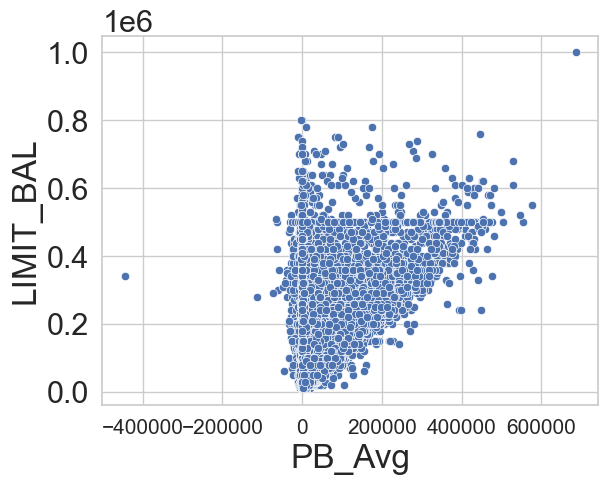

In [73]:
sns.scatterplot(x='PB_Avg', y='LIMIT_BAL', data = data3).tick_params(axis = 'x', labelsize = 15)
plt.show()

##### From the correlation and the plot, Payment behaviour and the credit limit does not have a strong correlation. It lies between 0.22-0.25 for individaul month and around 0.25 for average. 

## Method Chaining

In [74]:
def method_chaining (data):

    method_chain_data = (data.dtypes
                        .apply(lambda x: check_delim(data))
                        .apply(lambda x: ~data['EDUCATION'].isin([0, 5, 6]))
                        .apply(lambda x: ~data['MARRIAGE'].isin([0]))
                    )
    return data

In [75]:
import sys
sys.path.append('./code')

In [76]:
import code

In [77]:
import Project_Functions_Betty as pf
df = pf.method_chaining('../data/raw/default of credit card clients.xls')
df

NameError: name 'df_cleaned' is not defined